# Week10 - Lab

* Use PCA to reduce dimentionality and use a linear regression to predict
* Use t-SNE to visualize

In [33]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X = cancer['data']
y = cancer['target']
print(cancer.target_names)

['malignant' 'benign']


In [34]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

print(f'Training examples: {X_train.shape[0]:,}')
print(f'Test examples: {X_test.shape[0]:,}')

Training examples: 455
Test examples: 114


In [36]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# logistic regression
lr = LogisticRegression()
lr.fit(X_train_pca, y_train)

LogisticRegression()

In [37]:
from sklearn.metrics import classification_report, accuracy_score

# evaluating the logistic regression model
y_pred_test = lr.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test)

print("Accuracy of Logistic Regression on PCA-reduced data:", accuracy)
print("Classification Report:\n", report)

Accuracy of Logistic Regression on PCA-reduced data: 0.9473684210526315
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.92        38
           1       0.95      0.97      0.96        76

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



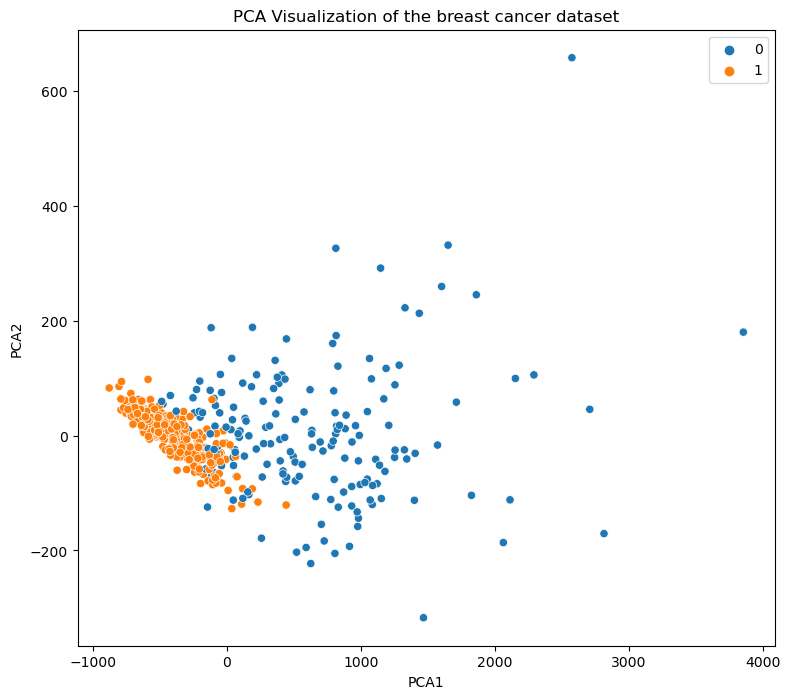

In [38]:
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# creating a DataFrame for the PCA results
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df['Target'] = y_train  

# plotting PCA visualization
plt.figure(figsize=(9, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Target', data=pca_df)
plt.title('PCA Visualization of the breast cancer dataset')
plt.legend()
plt.show()

These data points are a bit difficult to separate so we use TSNE which allows to visually separate the data

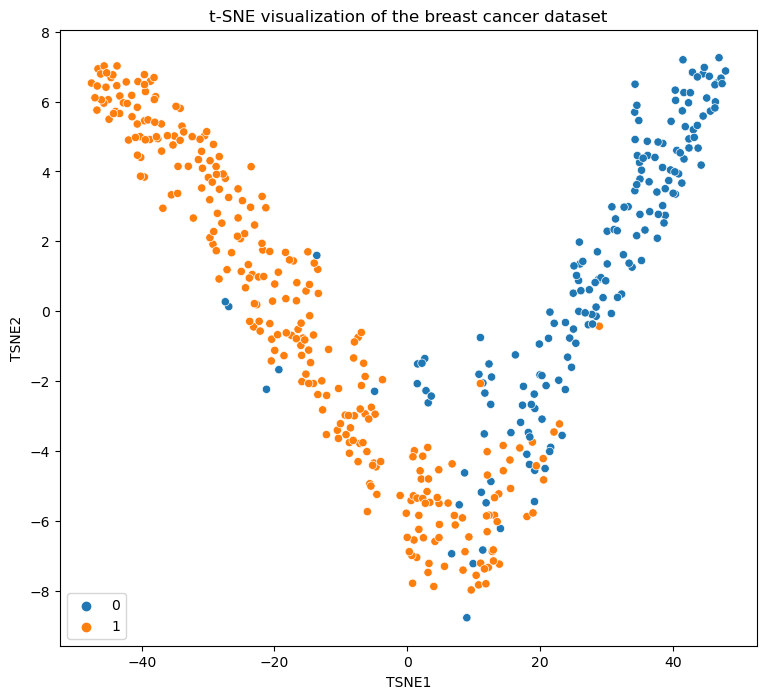

In [40]:
from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_train)

# creating a new dataframe for plotting
tsne_df = pd.DataFrame(X_train_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['Target'] = y_train

# plotting reduced data
plt.figure(figsize=(9, 8))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Target', data=tsne_df)
plt.title('t-SNE visualization of the breast cancer dataset')
plt.legend()
plt.show()